In [2]:
import os
os.environ['TF_CPP_MI_LOG_LEVEL'] = '2'
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# set seed to control randomness: to stop potential
seed = 128
rng = np.random.RandomState(seed)
# root directory settings


In [15]:
# setting root directory
root_dir = os.path.abspath('/home/nil/Documents/av_ml_practise/digit_reco/')
data_dir = os.path.join(root_dir, 'datasets')
sub_dir = os.path.join(root_dir, 'sample_sub')

In [16]:
# check existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

True

In [20]:
train_data = pd.read_csv(os.path.join(data_dir, 'train', 'train.csv'))
test_data = pd.read_csv(os.path.join(data_dir, 'test', 'Test.csv'))
sample_data = pd.read_csv(os.path.join(data_dir,'sample_sub','sample_submission.csv'))

In [21]:
train_data.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


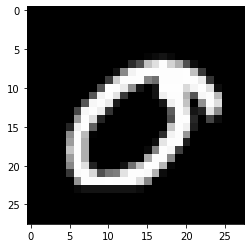

In [29]:
#image display
img_name = rng.choice(train_data.filename)
filepath = os.path.join(data_dir, 'train', 'Images', 'train', img_name)
img = imread(filepath)
plt.imshow(img);
